In [16]:
pip install gymnasium

In [17]:
import numpy as np
import gymnasium
import random
import tqdm


In [18]:
env=gymnasium.make("Taxi-v3",render_mode="ansi")

In [19]:
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [20]:
nb_states=env.observation_space.n
nb_actions=env.action_space.n
qtable=np.zeros((nb_states,nb_actions))

In [21]:
alpha=0.1
gama=0.6
epsilon=0.1

In [23]:
for i in tqdm.tqdm(range(1,100001)):
    state,_=env.reset()
    done=False
    while not done:
        if random.uniform(0,1)<epsilon:
            action=env.action_space.sample()
        else:
            action=np.argmax(qtable[state,:])
        next_state,reward,done,info,_=env.step(action)
        qtable[state,action]=qtable[state,action]+alpha*(reward+gama*np.max(qtable[next_state,:])-qtable[state,action])
        state=next_state


100%|██████████| 100000/100000 [01:12<00:00, 1370.30it/s]


In [24]:
total_epoch,total_penalties=0,0
episodes=100
frames=[]
for _ in range(episodes):
    state,_=env.reset()
    epochs,penalties,reward=0,0,0
    done=False
    while not done:
        action=np.argmax(qtable[state,:])
        next_state,reward,done,info,_=env.step(action)
        state=next_state

        if reward==-10:
            penalties+=1

        epochs+=1


    total_epoch+=epochs
    total_penalties+=penalties
print(f"Result after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epoch/episodes}")
print(f"Average penalties per episode: {total_penalties/episodes}")

Result after 100 episodes:
Average timesteps per episode: 13.56
Average penalties per episode: 0.0


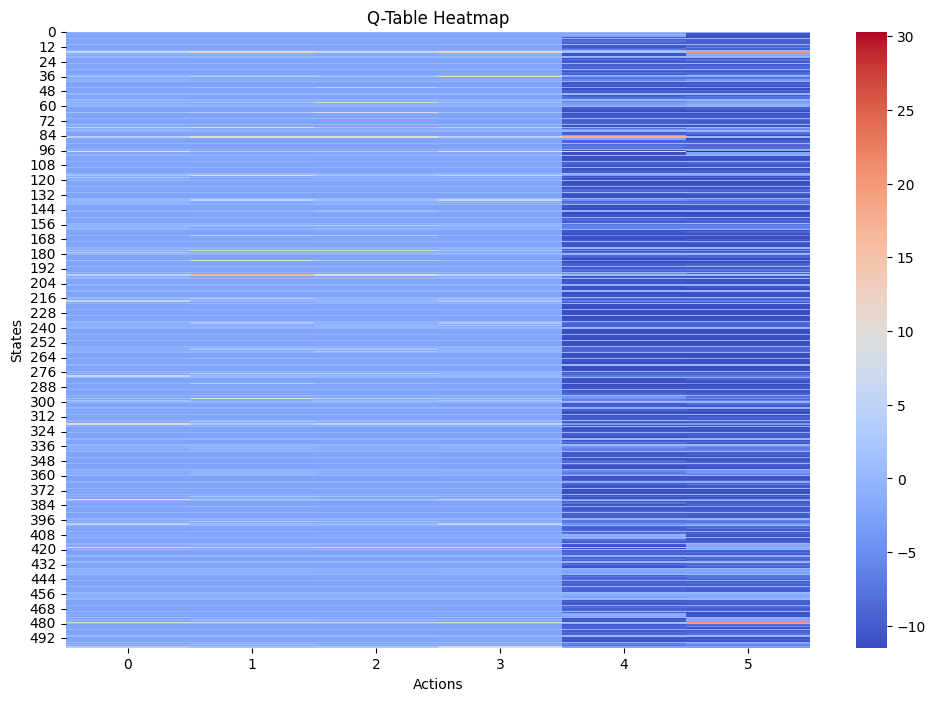

In [26]:
import seaborn as sns

# Q-Table Isı Haritası
plt.figure(figsize=(12, 8))
sns.heatmap(qtable, cmap='coolwarm', annot=False)
plt.title('Q-Table Heatmap')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()
